In [1]:
# plotting histograms of IWP data
# dduncan 12/2/18
import glob
dir = '/home/dudavid/projects/iwp/grids/' 
#nx, ny = 144, 72
binz = [1000*2**x for x in range(-14,6)] # same for all inputs

In [16]:
# read in number of months from reanalyses, gpm, spare-ice, dardar
#  new, 'v2' saved arrays have zero counts as first element
gpmfiles = glob.glob(dir+'gpr*histo*v1*.npy')  # didnt run zeros for gprof, cuz it's negligible from bayesian
erafiles = glob.glob(dir+'era*histo.all.v2*.npy')  #swp+ciwp
eracfiles= glob.glob(dir+'era*histo.all.ciwonly.v2*.npy') #ciwp only
merfiles = glob.glob(dir+'mer*histo*v2*.npy')
darfiles = glob.glob(dir+'dar*histo*v2*.npy')
sifiles  = glob.glob(dir+'spa*histo*v2*.npy')
i2files  = glob.glob(dir+'ice2c*histo*v2*.npy')
nb = 20
gpmh,sih,erah,merh,darh = np.zeros([nb-1]),np.zeros([nb]),np.zeros([nb]),np.zeros([nb]),np.zeros([nb])
i2ch = np.zeros([nb])
erach = np.zeros([nb])
for f in gpmfiles[:]: gpmh[:] += np.load(f)
for f in erafiles[:]: erah[:] += np.load(f)
for f in eracfiles[:]: erach[:] += np.load(f)
for f in merfiles[:]: merh[:] += np.load(f)
for f in darfiles[:]: darh[:] += np.load(f)
for f in sifiles[:]: sih[:] += np.load(f)
for f in i2files[:]: i2ch[:] += np.load(f)
print('% zeros (taken into account for PDF plotted!)')
#print(gpmh/np.sum(gpmh))
print(merh[0]/np.sum(merh))
print(erah[0]/np.sum(erah))
print(erach[0]/np.sum(erach))
print(darh[0]/np.sum(darh))
print(sih[0]/np.sum(sih))
print(i2ch[0]/np.sum(i2ch))
print('% (zeros + X btm bins')
print(np.sum(gpmh[0:4])/np.sum(gpmh))
print(np.sum(merh[0:5])/np.sum(merh))
print(np.sum(erah[0:5])/np.sum(erah))
print(np.sum(erach[0:5])/np.sum(erach))
print(np.sum(darh[0:5])/np.sum(darh))
print(np.sum(sih[0:5])/np.sum(sih))
print(np.sum(i2ch[0:5])/np.sum(i2ch))

% zeros (taken into account for PDF plotted!)
0.396855347206
0.340851302002
0.342633900542
0.480958222071
0.770917052421
0.514018067875
% (zeros + X btm bins
0.281056764765
0.52798501604
0.462132848823
0.475965349125
0.538280657514
0.770941738958
0.596339581674


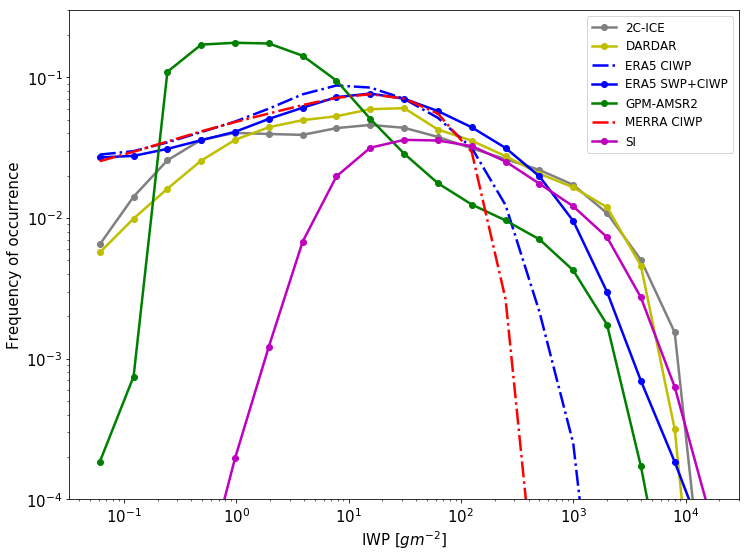

In [43]:
#binz = [0.0,.0001,.00025,.0005,0.001,.0025,.005,.01,.025,.05,.1,.25,.5,1,2]\n",
#hist, bin_edges = np.histogram(iwp,bins=binz)\n",
fs = 15
lw = 2.5
fig = plt.figure(figsize=[12,9])
ax = fig.add_subplot(111)
nsih = sih/np.sum(sih)
ngpmh = gpmh/np.sum(gpmh)
nerah = erah/np.sum(erah)
nerach = erach/np.sum(erach)
nmerh = merh/np.sum(merh)
ndarh = darh/np.sum(darh)
n2ch = i2ch/np.sum(i2ch)
#print(np.sum(nsih),np.sum(ndarh))  ## all should be 1...
# but the shapes look kind of odd due to zeros and very low values??
#print(ngpmh)
plt.plot(binz[0:nb-1],n2ch[1:],'k-o',label='2C-ICE',linewidth=lw,c='grey')
plt.plot(binz[0:nb-1],ndarh[1:],'y-o',label='DARDAR',linewidth=lw)
plt.plot(binz[0:nb-1],nerach[1:],'b-.',label='ERA5 CIWP',linewidth=lw)
plt.plot(binz[0:nb-1],nerah[1:],'b-o',label='ERA5 SWP+CIWP',linewidth=lw)
plt.plot(binz[0:nb-1],ngpmh[0:],'g-o',label='GPM-AMSR2',linewidth=lw)
plt.plot(binz[0:nb-1],nmerh[1:],'r-.',label='MERRA CIWP',linewidth=lw)
plt.plot(binz[0:nb-1],nsih[1:],'m-o',label='SI',linewidth=lw)
plt.yscale('log')
plt.xscale('log')
plt.xlabel('IWP [$g m^{-2}$]',fontsize=fs)
plt.ylabel('Frequency of occurrence',fontsize=fs)
plt.xticks(fontsize=fs)
plt.yticks(fontsize=fs)
#plt.title('IWP histo ')
axes = plt.gca()
axes.set_ylim([1e-4,3e-1])
plt.legend(fontsize=12)
plt.show()
fig.savefig('img/histo_v3.eps',bbox_inches='tight')#jpg',dpi=300)


In [32]:
import seaborn as sns
sns.reset_orig()
cs = sns.color_palette()